# Анализ данных о заработных платах

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Данные

Для анализа используются данные о "Среднемесячной номинальной начисленной заработной плате работников организаций по видам экономической деятельности в Российской Федерации за 2000-2023 гг." ([источник](https://rosstat.gov.ru/labor_market_employment_salaries))

Данные об уровне инфляции в стране ([источник](https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8))

Скачаем данные о заработных платах по ссылке.
Так как файл содержит несколько листов, то создадим dict из датафреймов, соответствующих этим листам.

In [2]:
df = pd.read_excel("https://rosstat.gov.ru/storage/mediabank/tab3-zpl_2023.xlsx", sheet_name=None, index_col=0)

# Предобработка данных

Сделаем предобработку данных каждого листа:

In [3]:
df['с 2017 г.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД2) В РОССИЙСКОЙ ФЕДЕРАЦИИ с 2017 года рублей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20171),2018.0,2019.0,2020.0,2021.0,20222),"20232), 3)"
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3


In [4]:
df['с 2017 г.'].dropna(how='all', inplace=True)
df['с 2017 г.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
NaN,20171),2018.0,2019.0,2020.0,2021.0,20222),"20232), 3)"
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777,52868.3
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3


In [5]:
df['с 2017 г.'].columns = df['с 2017 г.'].iloc[0]
df['с 2017 г.'] = df['с 2017 г.'][1:]
df['с 2017 г.'].head()

nan,20171),2018.0,2019.0,2020.0,2021.0,20222),"20232), 3)"
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777,52868.3
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3
рыболовство и рыбоводство,68032,75766.0,88603.8,94983.0,101547.4,121726.2,139520


In [6]:
list(df['с 2017 г.'])

['20171)', 2018.0, 2019.0, 2020.0, 2021.0, '20222)', '20232), 3)']

In [7]:
def fix_column_name(column_name):
  return int(column_name) if len(str(column_name)) == 4 else int(str(column_name)[:4])

In [8]:
df['с 2017 г.'].columns = list(map(fix_column_name, df['с 2017 г.'].columns))
df['с 2017 г.'].columns = df['с 2017 г.'].columns.astype(int)
df['с 2017 г.'].head()

,2017,2018,2019,2020,2021,2022,2023
Всего,39167,43724.0,47866.8,51344.0,57243.7,65338.3,73709.3
"сельское, лесное хозяйство, охота, рыболовство и рыбоводство",25671.1,28699.0,31727.6,34770.0,39436.8,46777,52868.3
"растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях",23529.1,25820.0,28395.8,31058.0,35460.2,41993.7,47582.9
лесоводство и лесозаготовки,27616.6,32701.0,35426.2,37855.0,42151.8,48327.2,52416.3
рыболовство и рыбоводство,68032,75766.0,88603.8,94983.0,101547.4,121726.2,139520


In [9]:
df['с 2017 г.'].tail()

,2017,2018,2019,2020,2021,2022,2023
деятельность административная и сопутствующие дополнительные услуги,27621.5,31706.0,34002.4,37090.0,39225.1,45067.3,49379.4
государственное управление и обеспечение военной безопасности; социальное обеспечение,43499.7,47803.0,50990.5,54496.0,58620.3,63505.2,73860.9
образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
деятельность в области здравоохранения и социальных услуг,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5
"деятельность в области культуры, спорта, организации досуга и развлечений",38200.1,44439.0,46990.4,48445.0,53340.3,57490.6,64929.1


In [10]:
df['2000-2016 гг.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,рублей,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0


In [11]:
df['2000-2016 гг.'].dropna(how='all', inplace=True)
df['2000-2016 гг.'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,рублей,NaN,NaN,NaN,NaN,NaN,NaN
NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0


In [12]:
df['2000-2016 гг.'].columns = df['2000-2016 гг.'].iloc[1]
df['2000-2016 гг.'] = df['2000-2016 гг.'][2:]

df['2000-2016 гг.'].head()

nan,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
добыча топливно-энергетических полезных ископаемых,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0


In [13]:
list(df['2000-2016 гг.'])

[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [14]:
df['2000-2016 гг.'].columns = list(map(fix_column_name, df['2000-2016 гг.'].columns))
df['2000-2016 гг.'].columns = df['2000-2016 гг.'].columns.astype(int)
df['2000-2016 гг.'].head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.,,,,,,,,,,,,,,,,,
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
добыча топливно-энергетических полезных ископаемых,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0


In [15]:
df['2000-2016 гг.'].columns

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016],
      dtype='int64')

In [16]:
df['2000-2016 гг.'].index.name

'СРЕДНЕМЕСЯЧНАЯ НОМИНАЛЬНАЯ НАЧИСЛЕННАЯ ЗАРАБОТНАЯ ПЛАТА РАБОТНИКОВ  ПО ПОЛНОМУ КРУГУ ОРГАНИЗАЦИЙ ПО ВИДАМ ЭКОНОМИЧЕСКОЙ ДЕЯТЕЛЬНОСТИ (в соответствии с ОКВЭД-2007) В РОССИЙСКОЙ ФЕДЕРАЦИИ ЗА 2000-2016гг.'

In [17]:
df['2000-2016 гг.'].index.name = ''
df['2000-2016 гг.'].index.name

''

In [18]:
df['2000-2016 гг.'].head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,,,,,,,,,,,,,,,,,
Всего по экономике,2223.4,3240.4,4360.3,5498.5,6739.5,8554.9,10633.9,13593.4,17290.1,18637.5,20952.2,23369.2,26628.9,29792.0,32495.0,34030.0,36709.0
"Сельское хозяйство, охота и лесное хозяйство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,9619.2,10668.1,12464.0,14129.4,15724.0,17724.0,19721.0,21755.0
"Рыболовство, рыбоводство",2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,22913.5,23781.9,25939.9,29201.4,32437.3,37062.0,46676.0,54927.0
Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,35363.4,39895,45132.0,50400.6,54161.2,58959.0,63695.0,69936.0
добыча топливно-энергетических полезных ископаемых,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,41568.3,46271.2,51587.9,57209.7,61084.1,66780.0,71418.0,77586.0


In [19]:
df['2000-2016 гг.'].tail()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,,,,,,,,,,,,,,,,,
"Операции с недвижимым имуществом, аренда и предоставление услуг",2456.7,3545.6,4677.1,6196.3,7795.4,10236.8,12763.2,16641.6,21275.0,22609.7,25623.4,28239.3,30925.8,33846.3,37559.0,39815.0,43737.0
Государственное управление и обеспечение военной безопасности; социальное страхование,2712.1,3754.9,5200.4,6913.8,7898.6,10958.5,13477.3,16896.3,21344.1,23960.0,25120.8,27755.5,35701.4,40448.7,42659.0,41916.0,43611.0
Образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0
Здравоохранение и предоставление социальных услуг,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,15723.8,17544.5,20640.7,24438.6,27068.0,28179.0,29742.0
"Предоставление прочих коммунальных, социальных и персональных услуг",1548.0,2311.7,3183.1,3920.3,4822.7,6291.0,7996.4,10392.2,13538.6,15070.0,16371.4,18200.3,20984.5,24739.9,27876.0,30072.0,32197.0


Считаем данные об инфляции:

In [20]:
df_inflation = pd.read_html("https://xn----ctbjnaatncev9av3a8f8b.xn--p1ai/%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%8B-%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8")[0]
df_inflation.head()

,Год,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
0,2024,7.44,7.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55
1,2023,11.76,10.97,3.51,2.30,2.50,3.24,4.30,5.13,6.00,6.68,7.47,7.42,7.42
2,2022,8.74,9.16,16.70,17.83,17.11,15.90,15.09,14.30,13.67,12.63,11.97,11.92,11.92
3,2021,5.19,5.67,5.78,5.52,6.01,6.51,6.47,6.69,7.41,8.14,8.40,8.39,8.39
4,2020,2.42,2.31,2.55,3.10,3.03,3.21,3.37,3.57,3.67,3.98,4.42,4.91,4.91


Выберем только колонки с данными по годам:

In [21]:
df_inflation_years = df_inflation.iloc[1:25][['Год','Всего']]
df_inflation_years

,Год,Всего
1,2023,7.42
2,2022,11.92
3,2021,8.39
4,2020,4.91
5,2019,3.05
6,2018,4.27
7,2017,2.52
8,2016,5.38
9,2015,12.91
10,2014,11.36


Выведем базовую аналитику данных об инфляции:

In [22]:
df_inflation_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 1 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Год     24 non-null     int64  
 1   Всего   24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 516.0 bytes


In [23]:
df_inflation_years.describe()

,Год,Всего
count,24.000000,24.000000
mean,2011.500000,9.644583
std,7.071068,4.536459
min,2000.000000,2.520000
25%,2005.750000,6.362500
50%,2011.500000,8.900000
75%,2017.250000,11.937500
max,2023.000000,20.200000


Выберем 3 вида экономической деятельности на каждом листе и создадим новый датафрейм с этими данными:

In [24]:
df_salaries1 = df['с 2017 г.'].loc[['строительство', 'образование', 'деятельность в области здравоохранения и социальных услуг']]
df_salaries1.rename(index={'деятельность в области здравоохранения и социальных услуг': 'здравоохранение и социальные услуги'}, inplace=True)
df_salaries1

,2017,2018,2019,2020,2021,2022,2023
строительство,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
образование,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
здравоохранение и социальные услуги,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5


Переименуем названия строк в датафрейме по второму листу для соответствия с названиями строк в первом листе:

In [25]:
df_salaries2 = df['2000-2016 гг.'].loc[['Строительство', 'Образование', 'Здравоохранение и предоставление социальных услуг']]
df_salaries2.rename(index={'Строительство': 'строительство', 'Образование': 'образование',
                           'Здравоохранение и предоставление социальных услуг': 'здравоохранение и социальные услуги'}, inplace=True)
df_salaries2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
,,,,,,,,,,,,,,,,,
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,21171.7,23682.0,25950.6,27701.4,29354.0,29960.0,32332.0
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,14075.2,15809.1,18995.3,23457.9,25862.0,26928.0,28088.0
здравоохранение и социальные услуги,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,15723.8,17544.5,20640.7,24438.6,27068.0,28179.0,29742.0


Создадим объединенный датафрейм с данными с двух листов:

In [26]:
df_salaries = pd.concat([df_salaries2, df_salaries1], axis=1)
df_salaries

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
здравоохранение и социальные услуги,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,...,27068.0,28179.0,29742.0,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5


Сделаем базовую аналитику данных:

In [27]:
df_salaries.shape

(3, 24)

In [28]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, строительство to здравоохранение и социальные услуги
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    3 non-null      float64
 1   2001    3 non-null      float64
 2   2002    3 non-null      float64
 3   2003    3 non-null      float64
 4   2004    3 non-null      float64
 5   2005    3 non-null      float64
 6   2006    3 non-null      float64
 7   2007    3 non-null      float64
 8   2008    3 non-null      float64
 9   2009    3 non-null      float64
 10  2010    3 non-null      object 
 11  2011    3 non-null      float64
 12  2012    3 non-null      float64
 13  2013    3 non-null      float64
 14  2014    3 non-null      float64
 15  2015    3 non-null      float64
 16  2016    3 non-null      float64
 17  2017    3 non-null      object 
 18  2018    3 non-null      float64
 19  2019    3 non-null      float64
 20  2020    3 non-null      float64
 21  20

Как видим, в данных **нету пропусков**, а тип данных в некоторых колонках - object. Для удобства дальнейшей работы преобразуем тип данных этих колонок во **float64**:

In [29]:
df_salaries = df_salaries.astype({2010: 'float64', 2017: 'float64', 2022: 'float64', 2023: 'float64'})

In [30]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, строительство to здравоохранение и социальные услуги
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    3 non-null      float64
 1   2001    3 non-null      float64
 2   2002    3 non-null      float64
 3   2003    3 non-null      float64
 4   2004    3 non-null      float64
 5   2005    3 non-null      float64
 6   2006    3 non-null      float64
 7   2007    3 non-null      float64
 8   2008    3 non-null      float64
 9   2009    3 non-null      float64
 10  2010    3 non-null      float64
 11  2011    3 non-null      float64
 12  2012    3 non-null      float64
 13  2013    3 non-null      float64
 14  2014    3 non-null      float64
 15  2015    3 non-null      float64
 16  2016    3 non-null      float64
 17  2017    3 non-null      float64
 18  2018    3 non-null      float64
 19  2019    3 non-null      float64
 20  2020    3 non-null      float64
 21  20

In [31]:
df_salaries

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
здравоохранение и социальные услуги,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,...,27068.0,28179.0,29742.0,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5


In [32]:
df_salaries.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1737.766667,2550.733333,3625.166667,4408.633333,5373.366667,6792.700000,8637.466667,11049.433333,14313.133333,15411.766667,...,27428.000000,28355.666667,30054.000000,31971.933333,37635.333333,40941.300000,44611.000000,48674.933333,54889.766667,61564.200000
std,782.569488,1135.026847,1028.989433,1537.396762,1685.014784,1963.118109,2006.300611,2912.757718,3790.253471,2468.183410,...,1773.616644,1523.700867,2139.133469,1710.165350,2934.316672,3360.023434,4985.713289,4619.211886,6241.539084,7341.166392
min,1240.200000,1833.000000,2927.300000,3386.600000,4203.400000,5429.700000,6983.300000,8778.300000,11316.800000,13293.600000,...,25862.000000,26928.000000,28088.000000,30257.600000,34361.000000,37071.900000,39563.000000,43390.500000,48400.200000,54262.700000
25%,1286.750000,1896.450000,3034.300000,3524.600000,4407.700000,5667.650000,7521.600000,9407.450000,12182.700000,14056.550000,...,26465.000000,27553.500000,28915.000000,31118.950000,36439.500000,39850.900000,42150.500000,47040.300000,51909.900000,57874.100000
50%,1333.300000,1959.900000,3141.300000,3662.600000,4612.000000,5905.600000,8059.900000,10036.600000,13048.600000,14819.500000,...,27068.000000,28179.000000,29742.000000,31980.300000,38518.000000,42629.900000,44738.000000,50690.100000,55419.600000,61485.500000
75%,1986.550000,2909.600000,3974.100000,4919.650000,5958.350000,7474.200000,9464.550000,12185.000000,15811.300000,16470.850000,...,28211.000000,29069.500000,31037.000000,32829.100000,39272.500000,42876.000000,47135.000000,51317.150000,58134.550000,65214.950000
max,2639.800000,3859.300000,4806.900000,6176.700000,7304.700000,9042.800000,10869.200000,14333.400000,18574.000000,18122.200000,...,29354.000000,29960.000000,32332.000000,33677.900000,40027.000000,43122.100000,49532.000000,51944.200000,60849.500000,68944.400000


Из аналитики можно увидеть наибольшие и наименьшие значения за каждый год, а также средние значения за год и медиану.

# Графики 1

Построим графики изменения номинальной заработной платы (НЗП) по годам для этих видов экономической деятельности:

In [33]:
years = df_salaries.columns
years

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

In [34]:
construction = df_salaries.loc['строительство']

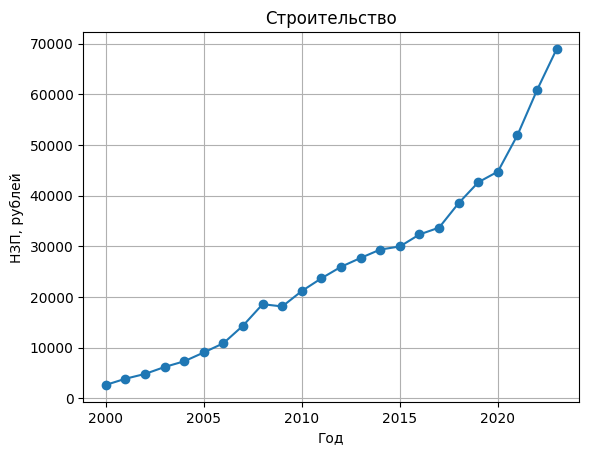

In [35]:
plt.plot(years, construction, marker='o')
plt.title('Строительство')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.grid()
plt.show()

In [36]:
education = df_salaries.loc['образование']

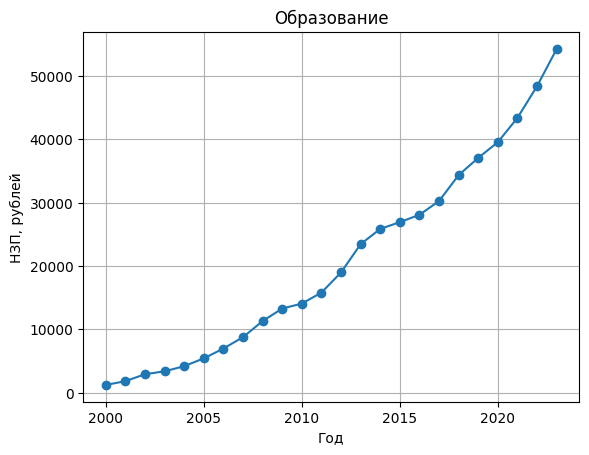

In [37]:
plt.plot(years, education, marker='o')
plt.title('Образование')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.grid()
plt.show()

In [38]:
healthcare = df_salaries.loc['здравоохранение и социальные услуги']

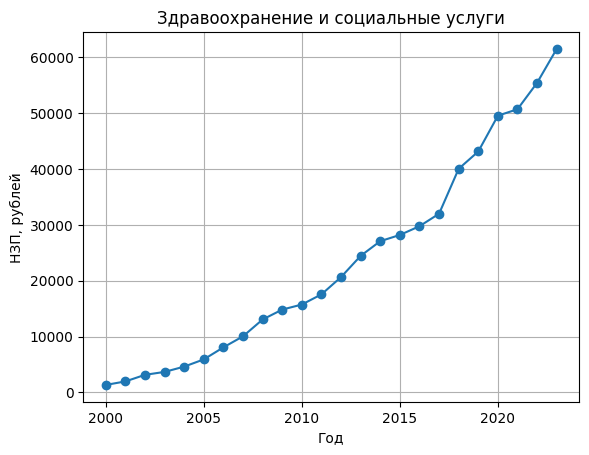

In [39]:
plt.plot(years, healthcare, marker='o')
plt.title('Здравоохранение и социальные услуги')
plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.grid()
plt.show()

Также построим объединенный график для всех трех видов экономической деятельности:

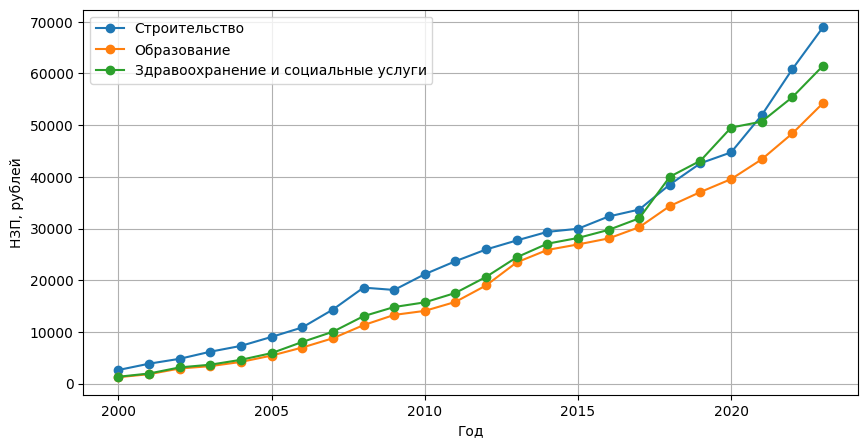

In [40]:
plt.figure(figsize=(10, 5))

plt.plot(years, construction, marker='o', label='Строительство')
plt.plot(years, education, marker='o', label='Образование')
plt.plot(years, healthcare, marker='o', label='Здравоохранение и социальные услуги')

plt.xlabel('Год')
plt.ylabel('НЗП, рублей')
plt.legend(loc=2)
plt.grid()
plt.show()

**Выводы**:

* НЗП по всем видам деятельности растет с каждым годом исходя из данных Ростата.
* НЗП в строительстве превышает большей частью НЗП в образовании и здравоохранении.
* НЗП в образовании в целом ниже, чем заработные платы в строительстве и здравохранении.

Как известно, **номинальная заработная плата** отображает количество полученных за выполненную работу денег. Она является количественным показателем.

Размер **реальной оплаты труда** отображает объем товаров и услуг, которые можно купить на полученные в виде зарплаты деньги. Похожее определение дано в постановлении Госкомстата РФ №148 от 12 сентября 1995 года.

Такая разновидность заработной платы является качественным показателем. Она демонстрирует покупательную способность полученных от работодателя денег. Для расчета реальной заработной платы потребуются следующие показатели:

1.   НЗП;
2.   ИПЦ – индекс потребительских цен или темпы инфляции.

Формула для расчета будет такой:

\begin{align}
РЗП = НЗП/ИПЦ \cdot 100%
\end{align}



[Ссылка](https://spmag.ru/articles/nominalnaya-i-realnaya-zarabotnaya-plata)

# Инфляция

Согласно [данным сайта](https://уровень-инфляции.рф/), откуда взяты данные об инфляции, уровень инфляции в России рассчитывается на основе **индекса потребительских цен** на товары и услуги, включая все налоги и сборы (т.е. отражает ту цену, которую платит конечный потребитель товаров и услуг).

Также, согласно [Росстату](https://rosstat.gov.ru/ps/inflation/), уровень инфляции рассчитывается по формуле:

\begin{align}
Инфляция = \text{Индекс потребительских цен} - 100%
\end{align}


Следовательно, для расчета ИПЦ (для соответствия формуле по расчету РЗП) на основе данных по уровню инфляции можно использовать формулу:


\begin{align}
\text{Индекс потребительских цен} = Инфляция + 100%
\end{align}

In [41]:
df_inflation_years.head()

,Год,Всего
1,2023,7.42
2,2022,11.92
3,2021,8.39
4,2020,4.91
5,2019,3.05


In [42]:
df_inflation_years['ИПЦ'] = df_inflation_years['Всего'] + 100
df_inflation_years.head()

,Год,Всего,ИПЦ
1,2023,7.42,107.42
2,2022,11.92,111.92
3,2021,8.39,108.39
4,2020,4.91,104.91
5,2019,3.05,103.05


Сделаем расчет реальной заработной платы за каждый год по приведенной выше формуле для выбранных видов экономической деятельности:

In [43]:
df_inflation_years.set_index('Год', inplace=True)
df_inflation_years.head()

,Всего,ИПЦ
Год,,
2023,7.42,107.42
2022,11.92,111.92
2021,8.39,108.39
2020,4.91,104.91
2019,3.05,103.05


In [44]:
df_salaries_real = df_salaries.copy()
df_salaries_real

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
здравоохранение и социальные услуги,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,...,27068.0,28179.0,29742.0,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5


In [45]:
consumer_price_index = df_inflation_years.loc[:, 'ИПЦ'].sort_index().values
consumer_price_index

array([120.2 , 118.58, 115.06, 111.99, 111.74, 110.91, 109.  , 111.87,
       113.28, 108.8 , 108.78, 106.1 , 106.58, 106.45, 111.36, 112.91,
       105.38, 102.52, 104.27, 103.05, 104.91, 108.39, 111.92, 107.42])

In [46]:
real_construction_salaries = (df_salaries_real.loc['строительство'].values / consumer_price_index * 100)
real_education_salaries = (df_salaries_real.loc['образование'].values / consumer_price_index * 100)
real_healthcare_salaries = (df_salaries_real.loc['здравоохранение и социальные услуги'].values / consumer_price_index * 100)

In [47]:
df_salaries_real.loc['строительство'] = np.round(real_construction_salaries, decimals=2)
df_salaries_real.loc['образование'] = np.round(real_education_salaries, decimals=2)
df_salaries_real.loc['здравоохранение и социальные услуги'] = np.round(real_healthcare_salaries, decimals=2)

In [48]:
df_salaries_real

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2196.17,3254.60,4177.73,5515.40,6537.23,8153.28,9971.74,12812.55,16396.54,16656.43,...,26359.55,26534.41,30681.34,32850.08,36940.63,41368.17,42644.17,47923.42,54368.75,64182.09
образование,1031.78,1545.79,2544.15,3024.02,3761.77,4895.59,6406.70,7846.88,9990.11,12218.38,...,23223.78,23849.08,26654.01,29513.85,32953.87,35974.67,37711.37,40031.83,43245.35,50514.52
здравоохранение и социальные услуги,1109.23,1652.81,2730.14,3270.47,4127.44,5324.68,7394.40,8971.66,11518.89,13620.86,...,24306.75,24957.05,28223.57,31194.21,38387.84,41845.80,47213.80,46766.40,49517.16,57238.41


По данным видно, что **значения заработных плат** за каждый год **снизились**.

# Влияние инфляции

Рассмотрим также, как влияет инфляция на изменение заработной платы по сравнению с предыдущим годом.

**Индекс номинальной заработной платы (ИНЗП)** показывает изменение номинальной заработной платы в процентах в сравнении с базовым периодом.

Индекс номинальной заработной платы можно высчитать по аналогии с индексом потребительских цен. Возьмем 2022 год за базовый период и сравним с ним номинальные зарплаты за 2023 год:

\begin{align}
ИНЗП = НЗП_{2023}/НЗП_{2022} \cdot 100%
\end{align}

In [49]:
df_salaries

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,18122.2,...,29354.0,29960.0,32332.0,33677.9,38518.0,42629.9,44738.0,51944.2,60849.5,68944.4
образование,1240.2,1833.0,2927.3,3386.6,4203.4,5429.7,6983.3,8778.3,11316.8,13293.6,...,25862.0,26928.0,28088.0,30257.6,34361.0,37071.9,39563.0,43390.5,48400.2,54262.7
здравоохранение и социальные услуги,1333.3,1959.9,3141.3,3662.6,4612.0,5905.6,8059.9,10036.6,13048.6,14819.5,...,27068.0,28179.0,29742.0,31980.3,40027.0,43122.1,49532.0,50690.1,55419.6,61485.5


In [50]:
df_salaries_index = np.round((df_salaries[2023] / df_salaries[2022] * 100), decimals=2)
df_salaries_index

строительство                          113.30
образование                            112.11
здравоохранение и социальные услуги    110.95
dtype: float64

Этот индекс нам говорит о том, что если средние номинальные заработные платы в 2022 году мы возьмем за 100%, то в 2023 году номинальные заработные платы будут 113.30% для строительства, например. Иными словами, этот индекс нам показывает, что в 2023 году средние номинальные заработные платы **выросли на 13.30%** по сравнению с 2022 годом.

Давайте точно так же рассчитаем теперь индекс реальной заработной платы.

**Индекс реальной заработной платы (ИРЗП)** показывает изменение реальной заработной платы в процентах в сравнении с базовым периодом (2022 год).

In [51]:
df_salaries_real

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
строительство,2196.17,3254.60,4177.73,5515.40,6537.23,8153.28,9971.74,12812.55,16396.54,16656.43,...,26359.55,26534.41,30681.34,32850.08,36940.63,41368.17,42644.17,47923.42,54368.75,64182.09
образование,1031.78,1545.79,2544.15,3024.02,3761.77,4895.59,6406.70,7846.88,9990.11,12218.38,...,23223.78,23849.08,26654.01,29513.85,32953.87,35974.67,37711.37,40031.83,43245.35,50514.52
здравоохранение и социальные услуги,1109.23,1652.81,2730.14,3270.47,4127.44,5324.68,7394.40,8971.66,11518.89,13620.86,...,24306.75,24957.05,28223.57,31194.21,38387.84,41845.80,47213.80,46766.40,49517.16,57238.41


In [52]:
df_salaries_real_index = np.round((df_salaries_real[2023] / df_salaries_real[2022] * 100), decimals=2)
df_salaries_real_index

строительство                          118.05
образование                            116.81
здравоохранение и социальные услуги    115.59
dtype: float64

Теперь мы можем сравнить скорости изменения номинальных и реальных заработных плат и посмотреть на темп инфляции.
Значения ИНЗП, ИРЗП, а также ИПЦ за 2022 год мы принимаем за 100%, как говорилось выше.

\begin{align}
ИНЗП_{2022} = 100\%
\end{align}

\begin{align}
ИРЗП_{2022} = 100\%
\end{align}

\begin{align}
ИПЦ_{2022} = 100\%
\end{align}

В таблице отобразим значения за 2023 год:

In [53]:
df_indices = pd.concat([df_salaries_index, df_salaries_real_index], axis=1, keys=['ИНЗП %', 'ИРЗП %'])
df_indices['ИПЦ'] =  df_inflation_years.loc[2023, 'ИПЦ']
df_indices

,ИНЗП %,ИРЗП %,ИПЦ
строительство,113.30,118.05,107.42
образование,112.11,116.81,107.42
здравоохранение и социальные услуги,110.95,115.59,107.42


Из этих данных видно, что по сравнению с 2022 годом есть рост НЗП и РЗП, **причем РЗП выросло даже больше, чем НЗП**. Это может быть связано со значением **ИПЦ**, которое в **2022** было **111.92%**, а стало **107.42%** в **2023**.

Сделаем такие расчеты **для РЗП по всем данным**: будем сравнивать каждый год с предыдущим:

In [54]:
df_tr = df_salaries_real.transpose()
df_tr[['ИРЗП % строительство', 'ИРЗП % образование', 'ИРЗП % здравоохранение и социальные услуги']] = np.round(df_tr.div(df_tr.shift(1)).multiply(100).fillna(df_tr), decimals=2)
df_tr.iloc[0, 3:] = np.nan
df_tr

,строительство,образование,здравоохранение и социальные услуги,ИРЗП % строительство,ИРЗП % образование,ИРЗП % здравоохранение и социальные услуги
2000,2196.17,1031.78,1109.23,NaN,NaN,NaN
2001,3254.60,1545.79,1652.81,148.19,149.82,149.01
2002,4177.73,2544.15,2730.14,128.36,164.59,165.18
2003,5515.40,3024.02,3270.47,132.02,118.86,119.79
2004,6537.23,3761.77,4127.44,118.53,124.40,126.20
2005,8153.28,4895.59,5324.68,124.72,130.14,129.01
2006,9971.74,6406.70,7394.40,122.30,130.87,138.87
2007,12812.55,7846.88,8971.66,128.49,122.48,121.33
2008,16396.54,9990.11,11518.89,127.97,127.31,128.39
2009,16656.43,12218.38,13620.86,101.59,122.30,118.25


**Вывод**: из расчетов видно, что по всем трем областям идет резкое снижение **ИРЗП** в 2009-2010 гг., далее идут периоды как роста, так и снижения ИРЗП, с последующим увеличением ИРЗП в 2023 году.

# Графики 2

Отобразим график влияния инфляция на изменение реальной заработной платы по сравнению с предыдущим годом:

In [55]:
years = df_tr.index
years

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

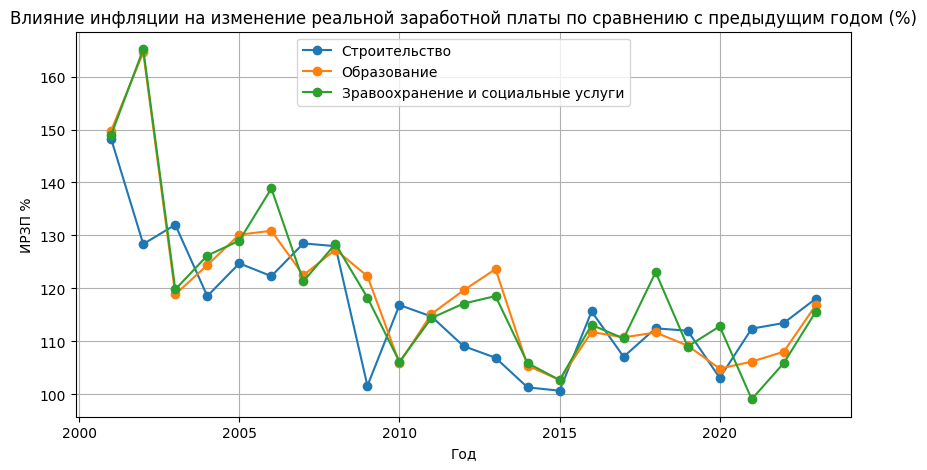

In [56]:
plt.figure(figsize=(10, 5))

construction_real_index = df_tr['ИРЗП % строительство']
education_real_index = df_tr['ИРЗП % образование']
healthcare_real_index = df_tr['ИРЗП % здравоохранение и социальные услуги']

plt.plot(years, construction_real_index, marker='o', label='Строительство')
plt.plot(years, education_real_index, marker='o', label='Образование')
plt.plot(years, healthcare_real_index, marker='o', label='Зравоохранение и социальные услуги')

plt.title('Влияние инфляции на изменение реальной заработной платы по сравнению с предыдущим годом (%)')

plt.xlabel('Год')
plt.ylabel('ИРЗП %')
plt.legend(loc=9)
plt.grid()
plt.show()

Построим графики изменения реальных и номинальных заработных плат по годам для выбранных видов экономической деятельности:

In [57]:
years = df_salaries_real.columns
years

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

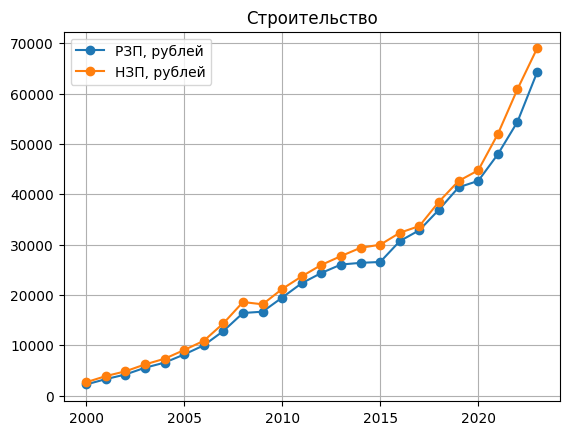

In [58]:
construction_real = df_salaries_real.loc['строительство']
plt.plot(years, construction_real, marker='o', label='РЗП, рублей')
plt.plot(years, construction, marker='o', label='НЗП, рублей')

plt.title('Строительство')
plt.legend(loc=2)
plt.grid()
plt.show()

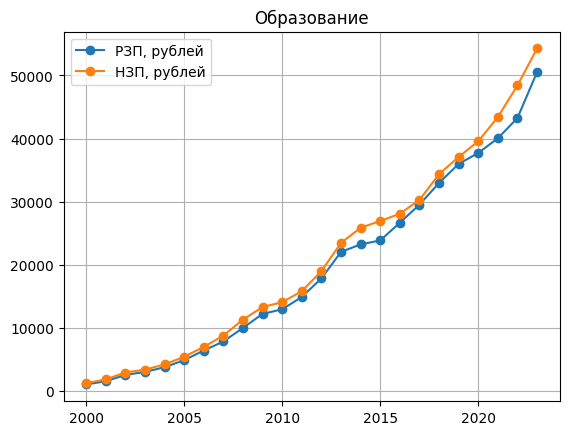

In [59]:
education_real = df_salaries_real.loc['образование']
plt.plot(years, education_real, marker='o', label='РЗП, рублей')
plt.plot(years, education, marker='o', label='НЗП, рублей')

plt.title('Образование')
plt.legend(loc=2)
plt.grid()
plt.show()

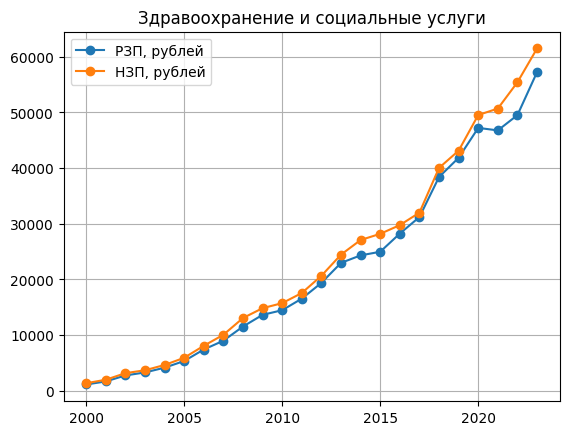

In [60]:
healthcare_real = df_salaries_real.loc['здравоохранение и социальные услуги']
plt.plot(years, healthcare_real, marker='o', label='РЗП, рублей')
plt.plot(years, healthcare, marker='o', label='НЗП, рублей')

plt.title('Здравоохранение и социальные услуги')
plt.legend(loc=2)
plt.grid()
plt.show()

**Вывод:** На всех трех графиках видно, что НЗП и РЗП сначала идут почти вровень, но потом можно наблюдать снижение РЗП относительно НЗП.

# Дополнительные исследования

Рассмотрим также такой показатель, как ВВП, и его корреляцию с динамикой реальных зарплат (с учетом инфляции).

Загрузим данные о ВВП ([источник](https://rosstat.gov.ru/storage/mediabank/VVP_god_s_1995-2023.xlsx)) и сделаем предобработку:

In [61]:
df = pd.read_excel("https://rosstat.gov.ru/storage/mediabank/VVP_god_s_1995-2023.xlsx", sheet_name=None, index_col=0)

In [62]:
df['1'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
К содержанию,,,,,,,,,,,,,,,,
"Валовой внутренний продукт\n(в текущих ценах, млрд.руб., до 1998г.-трлн.руб.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1996.0000,1997.000,1998.000,1999.0000,2000.0000,2001.0000,2002.0,2003.000000,2004.00000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.00000,2011.000000
1428.5221,2007.8251,2342.514,2629.623,4823.2335,7305.6463,8943.5824,10830.5,13208.233779,17027.19086,21609.765489,26917.201375,33247.513229,41276.849187,38807.218575,46308.54119,55967.226762


In [63]:
df['1'].dropna(how='all', inplace=True)
df['1'].reset_index(inplace=True)
df['1'].columns = (df['1'].iloc[0]).astype(int)

df['1'] = df['1'][1:]
df['1'] = df['1'].iloc[:, 5:16]

df['1'].head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,7305.6463,8943.5824,10830.5,13208.233779,17027.19086,21609.765489,26917.201375,33247.513229,41276.849187,38807.218575,46308.54119


In [64]:
df['2'].head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
К содержанию,,,,,,,,,,,,
"Валовой внутренний продукт1)\n(в текущих ценах, млрд.руб.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,2012.000000,2013.00000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.00000,2021.00000,20222),20232)
60114.00083687563,68103.449628,72985.70113,79030.040075,83087.360055,85616.083815,91843.154241,103861.651089,109608.305741,107658.13103,135773.76902,155188.881116,172148.311913
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df['2'].dropna(how='all', inplace=True)
df['2'].reset_index(inplace=True)

df['2'].columns = df['2'].iloc[0]
df['2'].columns = list(map(fix_column_name, df['2'].columns))
df['2'].columns = df['2'].columns.astype(int)

df['2'] = df['2'][1:]

df['2'].head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,60114.000837,68103.449628,72985.70113,79030.040075,83087.360055,85616.083815,91843.154241,103861.651089,109608.305741,107658.13103,135773.76902,155188.881116,172148.311913


In [66]:
df_gdp = pd.concat([df['1'], df['2']], axis=1)
df_gdp

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,7305.6463,8943.5824,10830.5,13208.233779,17027.19086,21609.765489,26917.201375,33247.513229,41276.849187,38807.218575,...,79030.040075,83087.360055,85616.083815,91843.154241,103861.651089,109608.305741,107658.13103,135773.76902,155188.881116,172148.311913


In [67]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 1 to 1
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    1 non-null      float64
 1   2001    1 non-null      float64
 2   2002    1 non-null      float64
 3   2003    1 non-null      float64
 4   2004    1 non-null      float64
 5   2005    1 non-null      float64
 6   2006    1 non-null      float64
 7   2007    1 non-null      float64
 8   2008    1 non-null      float64
 9   2009    1 non-null      float64
 10  2010    1 non-null      float64
 11  2011    1 non-null      float64
 12  2012    1 non-null      float64
 13  2013    1 non-null      float64
 14  2014    1 non-null      float64
 15  2015    1 non-null      float64
 16  2016    1 non-null      float64
 17  2017    1 non-null      float64
 18  2018    1 non-null      float64
 19  2019    1 non-null      float64
 20  2020    1 non-null      float64
 21  2021    1 non-null      float64
 22  2022  

In [68]:
df_gdp = df_gdp.astype({2022: 'float64', 2023: 'float64'})

In [69]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 1 to 1
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    1 non-null      float64
 1   2001    1 non-null      float64
 2   2002    1 non-null      float64
 3   2003    1 non-null      float64
 4   2004    1 non-null      float64
 5   2005    1 non-null      float64
 6   2006    1 non-null      float64
 7   2007    1 non-null      float64
 8   2008    1 non-null      float64
 9   2009    1 non-null      float64
 10  2010    1 non-null      float64
 11  2011    1 non-null      float64
 12  2012    1 non-null      float64
 13  2013    1 non-null      float64
 14  2014    1 non-null      float64
 15  2015    1 non-null      float64
 16  2016    1 non-null      float64
 17  2017    1 non-null      float64
 18  2018    1 non-null      float64
 19  2019    1 non-null      float64
 20  2020    1 non-null      float64
 21  2021    1 non-null      float64
 22  2022  

In [70]:
df_general = pd.concat([df_salaries_real.transpose(), df_gdp.transpose()], axis=1)
df_general.rename(columns={1: 'ВВП'}, inplace=True)
df_general['ВВП'] = np.round(df_general['ВВП'], decimals=2)
df_general

,строительство,образование,здравоохранение и социальные услуги,ВВП
2000,2196.17,1031.78,1109.23,7305.65
2001,3254.60,1545.79,1652.81,8943.58
2002,4177.73,2544.15,2730.14,10830.50
2003,5515.40,3024.02,3270.47,13208.23
2004,6537.23,3761.77,4127.44,17027.19
2005,8153.28,4895.59,5324.68,21609.77
2006,9971.74,6406.70,7394.40,26917.20
2007,12812.55,7846.88,8971.66,33247.51
2008,16396.54,9990.11,11518.89,41276.85
2009,16656.43,12218.38,13620.86,38807.22


Построим матрицу корреляции на основе данных о реальных зарплатах и ВВП за те же годы:

In [71]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.9 MB/s eta 0:00:00


interval columns not set, guessing: ['строительство', 'образование', 'здравоохранение и социальные услуги', 'ВВП']


<Axes: >

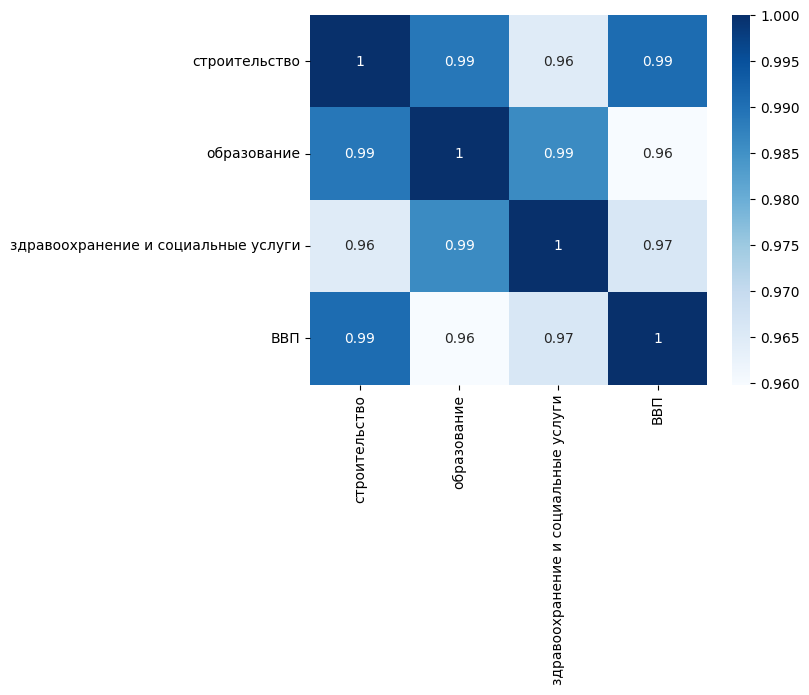

In [72]:
import phik
import seaborn as sns

ph = df_general.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

**Вывод:** между ВВП и реальными заработными платами виден довольно высокий уровень корреляции.

Выгрузим все данные, полученные в ходе анализа, в csv:

In [73]:
df_salaries.transpose().to_csv('salaries.csv')

In [74]:
df_salaries_real.transpose().to_csv('salaries_real.csv')

In [75]:
df_inflation_years.to_csv('inflation.csv')

In [76]:
df_tr.to_csv('inflation-influence.csv')

In [77]:
df_general.to_csv('salaries_real_gdp.csv')